## 1. Introduction

The COVID-19 pandemic has influenced our lives in various ways, including social interactions, work environment, shopping activities, home location, and transportation of people and goods. The social and economic disturbances derived from lockdowns and travel restrictions caused many activities to be shifted to an online setting to avoid social exposure and, thus, risk of getting or transmitting the novel coronavirus. As most COVID-19 restrictions have been lifted in the US and society now seems to be facing more sense of normalcy, many have questioned the likelihood of which these changes will be permanent, and how the pandemic impacted numerous areas in our society, especially regarding work from home and work and life balance.

One of the most conspicuous changes since the COVID-19 outbreak has been the substantial increase in online working as well as online learning. This unprecedented experience has resulted in massive changes and its impacts have been positive in some ways but negative in others in different countries. For instance, by analyzing over 100,000 tweets expressing people’s attitudes toward WFH experience during the pandemic in India, Dubey and Tripathi, (2020) observed that more than 73% of people had a positive sentiment, and over 60% depicted trust and joy for WFH culture, expressing a positive perception of remote working. Similarly, Walker et al., (2020) found that most teachers in their survey found their WFH hours to be manageable during the pandemic. Beck et al., (2020) also found that telecommuting has been a positive experience, and many would like to work remotely more than they used to before the pandemic if they have appropriate space to do so. On the other hand, a study conducted in Indonesia showed that employees who were forced to work remotely were not able to properly have a work-life balance, presumably because they are still used to having fixed working hours, which was indicated by WFH effects in decreased level of job satisfaction (Irawanto et al., 2021). 

In this study, we strive to understand the future of WFH by employing a nationwide two-wave survey data from the United States. In particular, we will strive to address the following problems: 

- A descriptive analysis on the different levels of WFH from pre-pandemic to during pandemic and also to the expected future. This analysis can help us to understand and quantify the change in WFH from pre-pandemic to post-pandemic period.
-   Incorporating sociodemographic features into a machine learning classifiers to investigate the factors that can help us to predict "who will WFH in the future?".
- What are the effects and implications of the shift to WFH on trasportatiin system and and transit use and environment?

Link to repository : https://github.com/Savila25/CS-418-Project/blob/main/Project%20progress%20report.ipynb


### 1.1. Any changes since the proposal?
In our proposal, the expected deliverables were listed as follows:

- A descriptive analysis on the different levels of WFH from pre-pandemic to during pandemic and also to the expected future.
- Finding the probability of each person to be working from home in the future based on features such as job category, risk perception, car ownership, income and education level,gender, number of children in household, age, and attitudinal variables such as being teksavvy or pro environment. 
- Incorporating the mentioned features into a machine learning approach (to be determined in the future) to investigate the factors that can help us to predict who will WFH in the future?
- Ideally we would want to produce two models for both pre and post pandemic.
- We would also want to be able to show certain features importance i.e private car, family, etc.

The scope of our project has not change since the check-in proposal slides. Some of our deliverables have been finalized and aill be presentedin the following sections and the rest will be included in the final version of our project.



## 2. Data 

To investigate the impacts of the Covid-19 pandemic on the working from home patterns, we utilized the information from a comprehensive survey conducted in the United States. 


Our dataset is a longitudinal survey that was conducted to obtain data regarding the effects of the COVID-19 pandemic on activity-travel behavior of individuals. The COVID Future is an extensive nation-wide survey that was implemented in two waves across the United States from April 2020 to May 2021 (Around 3000 observations).
The survey encompasses four major categories: 1) socio-demographic variables such as age, gender, ethnicity, working status, job category, and household income; 2) individuals’ shopping habits before and during the COVID-19 pandemic as well as their expectation about their behavior in the future after the pandemic is over; 3) individuals’ mode choice habits before and during the pandemic accounting for the perceived risk of exposure to the virus, and 4) telecommuting behavior before and during the pandemic such as the frequency of commuting as well as telecommuting, individuals’ attitudes and perceptions about working from home, and the level of productivity while working from home as compared to their workplace. This panel dataset enables us to track the evolution of changes in the WFH patterns from the before pandemic to during and after the pandemic periods.

In [5]:
# Importing the data
import pandas as pd
import numpy as np
import os
# Data = pd.read_excel("Data.xlsx")
# Data_wave1= Data.iloc[:,8:45]
# Data_wave2= Data.iloc[:, 58:73]
# Data_wave1.head()

### 2.1 Data preparation

- In order to start our analsis, first, we merged the datasets from wave 1 and wave 2 of the survey. 
- In terms of granularity, each row of our dataset is a person who has responded to the survey.
- In terms of temporality, the data covers the right time frame since it has been collected from April 2020 to May 2021 in the United States.

The following Table presents the distributions of the sociodemographic characteristics of the collected sample.In this table, you can see the distribution of several variables for both wiegthed and unweghted samples. The weighting process has been performed to approach the U.S. adults demographics in 2019 to make the sample more representative of the population.

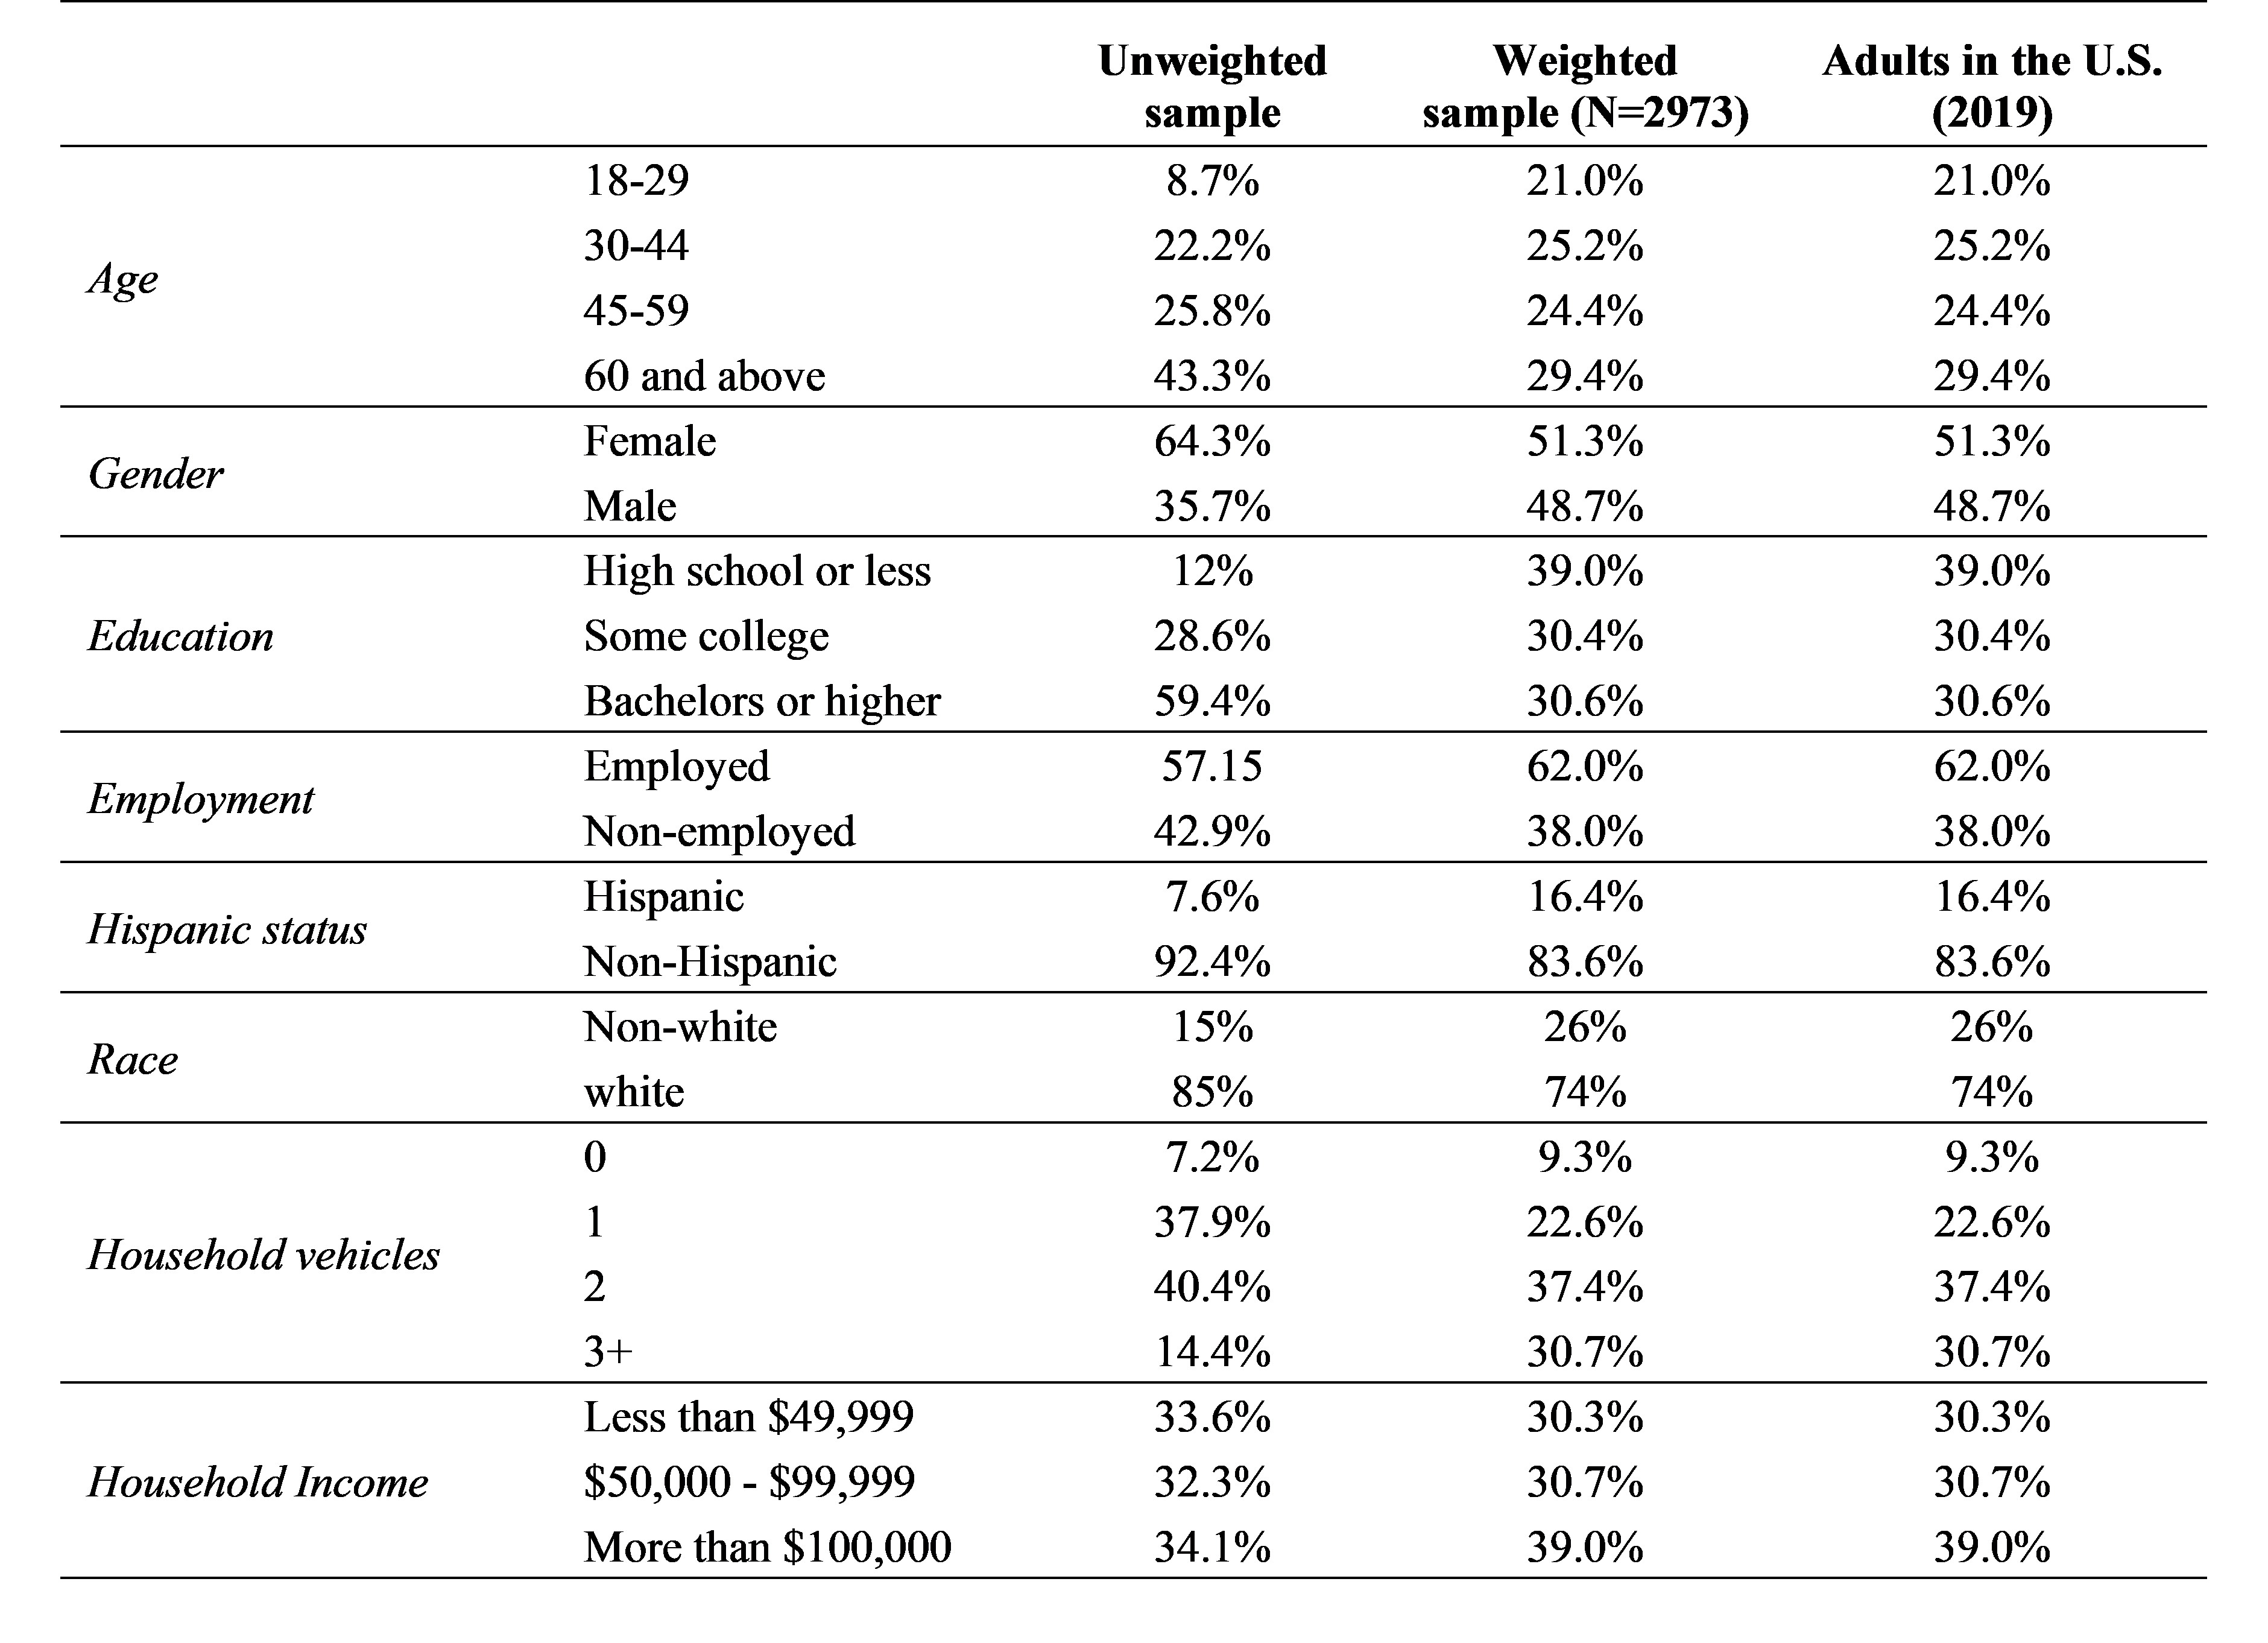

### Descriptive Analysis

The following figure presents the availability of WFH across various population groups of workers who have not been laid off during the pandemic. As can be seen, the average percentage of the employees with the option to WFH has increased from 37% in pre-pandemic to 58% and 53% in waves 1 and 2, respectively. The transition from pre-pandemic to wave 1 indicates a remarkable surge across all population groups, yet it is not equally distributed. In all periods depicted in this Figure, females, households with an annual income lower than $120 k and people with education levels lower than bachelor’s degrees have below-average access to the opportunity to WFH.

The two major contributing factors explaining the underlying heterogeneity are income and education level. There is a gender gap indicating that males have more options to WFH compared to females in all periods, yet the effect is not as considerable as income or education. After the pandemic, on average, 48% of the respondents expect to have the option to WFH, indicating a 30% growth compared to the pre-pandemic period. 

According to the desriptive analysis, we introduce three hypotheses:
- Having a higher degree is positively correlated with the frequency of WFH after the pandemic.
- Having a higher income is positively correlated with the frequency of WFH after the pandemic.
- Being male is positively correlated with the frequency of WFH after the pandemic.

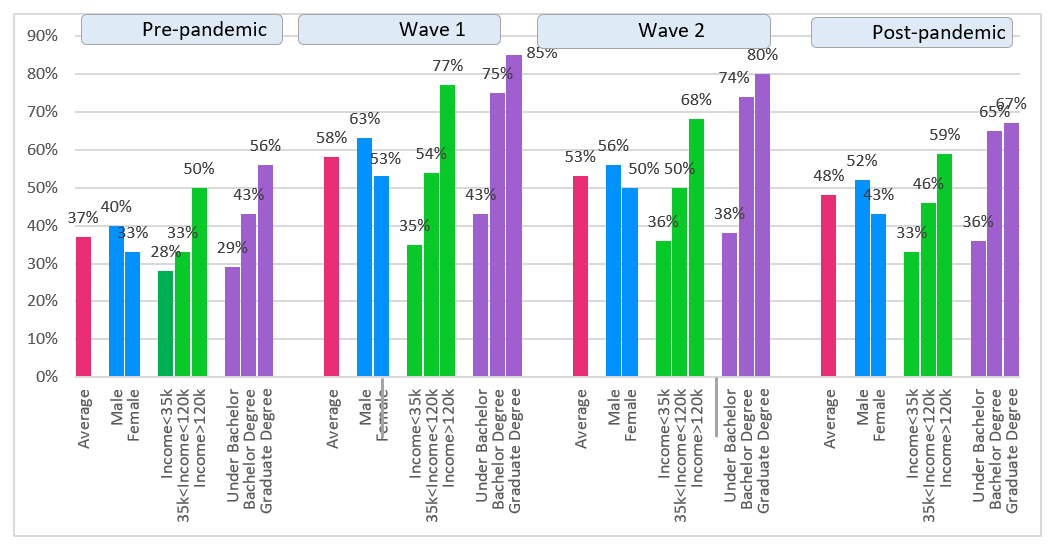

In [2]:
import urllib, json
import plotly.graph_objects as go
import plotly


url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
response = urllib.request.urlopen(url)
data = json.loads(response.read())


# override gray link colors with 'source' colors
opacity = 0.4


# change 'magenta' to its 'rgba' value to add opacity
data['data'][0]['node']['color'] = ['rgba(255,0,255, 0.8)' if color == "magenta" else color for color in data['data'][0]['node']['color']]
data['data'][0]['link']['color'] = [data['data'][0]['node']['color'][src].replace("0.8", str(opacity))
                                    for src in data['data'][0]['link']['source']]



fig = go.Figure(data=[go.Sankey(

     node = dict(                                                                                              
      thickness = 25,
      line = dict(color = "green", width = 0.9),
      label = ["Frequent (16%) ", "Infrequent (21%)","No Option (63%)",\
               "Frequent (46%) ","Infrequent (5%)", "No Option (36%)","Unemployed (13%)",\
               "Frequent (45%) ", "Infrequent (4%)", "No Option (42%)","Unemployed (9%)",\
               "Frequent (34%) ", "Infrequent (14%)","No Option (52%)"],
              # "x": [0.2, 0.1, 0.5, 0.7, 0.3, 0.5,0.8,0.9,1],
               #"y": [0.7, 0.5, 0.2, 0.4, 0.2, 0.3,0.6,0.5,0.7],
             #  'pad':10,  # 10 Pixels
          #    color =  data['data'][0]['node']['color']  ),  # This is for automatic coloring

     color =  ["#FF7F0E","royalblue","#990099","#FF7F0E","royalblue",\
               "#990099","forestgreen","#FF7F0E","royalblue","#990099","forestgreen","#FF7F0E","royalblue","#990099"]),
    
       
    
        link = dict( 
          

      source = [0,0,0,0,1,1,1,1,2,2,2,2,    3,3,3,3,4,4,4,4,5,5,5,5,6,6,6,6 ,    7,7,7,8,8,8,9,9,9,10,10,10 ],     # Source is the start point of a link. 0 means the first specified name the previosly definde lables
      target = [3,4,5,6,3,4,5,6,3,4,5,6,   7,8,9,10,7,8,9,10,7,8,9,10,7,8,9,10,   11,12,13,11,12,13,11,12,13,11,12,13],     # Target is the end point of a link. 0 means the first specified name the previosly definde lables. you can link from any two nodes
    
      value =[14.5,	0.3,	0.4,	0.6,16.1,	2.2,	1.6,	1.1,15.3,	2.2,	34.3,	11.4,
              40.5,	2.2,	1.9,	1.4,1.4,	0.6,	2.1,	0.6,2.5,	0.3,	31.2,	2.3,0.7,	0.6,	6.6,	5.2,
              30.2,	8.0,	6.8, 0.6,	2.1,	0.9, 1.0,	1.7,	39.2, 1.8,	1.9,	5.7
],
          
          
       #   color =  data['data'][0]['link']['color'] 
           color =  ["#FBE426","#FBE426","#FBE426","#FBE426","lightskyblue","lightskyblue","lightskyblue","lightskyblue","#A777F1","#A777F1","#A777F1","#A777F1",\
                    "#FBE426","#FBE426","#FBE426", "#FBE426","lightskyblue","lightskyblue","lightskyblue","lightskyblue","#A777F1","#A777F1","#A777F1","#A777F1", "palegreen", "palegreen", "palegreen", "palegreen",\
                   "#FBE426","#FBE426","#FBE426","lightskyblue","lightskyblue","lightskyblue","#A777F1","#A777F1","#A777F1", "palegreen", "palegreen", "palegreen"]

))])
  

  
# This is for the layout and size of the plot
fig.update_layout(autosize=False,
    width=1100,
    height=480,

)




#fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.add_annotation(text="Pre-pandemic",
                  xref="paper", yref="paper",
                  x=0, y=1.08, showarrow=False)

fig.add_annotation(text="Wave 1",
                  xref="paper", yref="paper",
                  x=0.32, y=1.1, showarrow=False)

fig.add_annotation(text="Wave 2",
                  xref="paper", yref="paper",
                  x=0.69, y=1.1, showarrow=False)

fig.add_annotation(text="Expected post-pandemic",
                  xref="paper", yref="paper",
              #    font=dict(
                #  color="red" ),
          
           
                  x=1., y=1.08, showarrow=False)

#fig.add_annotation(text="N=1592",
 ##                 x=0.5, y=-0.2, showarrow=False)

#plot(fig)

## Plots

In [ ]:
test = {
    "preWfh" :Data_wave1["wfh_pre"],
    "Gender": Data_wave1["gender"],
    "education":Data_wave1["educ"],
    "wfhOne": Data_wave1["wfh_now"],
    "income":Data_wave1["hhincome"],
    "wfhTwo":Data_wave2["wfh_now.1"],
    "wfhPost":Data_wave2["wfh_expect"]
}
combined = pd.DataFrame(test)
combined

,preWfh,Gender,education,wfhOne,income,wfhTwo,wfhPost
0,No,Male,Bachelor's degree(s) or some graduate school,Yes,"$75,000 to $99,999",Yes,Yes
1,Yes,Male,Completed graduate degree(s),Yes,"$150,000 to $199,999",Yes,Yes
2,No,Female,Some college or technical school,Yes,"$150,000 to $199,999",Yes,Yes
3,Yes,Male,Completed graduate degree(s),Yes,"$100,000 to $124,999",Yes,Yes
4,Yes,Female,Bachelor's degree(s) or some graduate school,Yes,"$35,000 to $49,999",Yes,Yes
...,...,...,...,...,...,...,...
2900,Question not displayed to respondent,Male,Bachelor's degree(s) or some graduate school,Question not displayed to respondent,"$100,000 to $124,999",Yes,Yes
2901,No,Female,Completed high school or GED,No,"$150,000 to $199,999",No,No
2902,No,Male,Bachelor's degree(s) or some graduate school,No,"$200,000 or more",No,No
2903,Yes,Female,Completed graduate degree(s),No,"$75,000 to $99,999",Yes,Yes


In [ ]:
#Pre Pandemic
yesCounter = 0
noCounter = 0

mCount = 0
fCount = 0

incomeOne = 0
incomeTwo = 0
incomeThree = 0

edOne = 0
edTwo = 0
edThree = 0

hispCount = 0;
race1Count = 0
race2Count = 0
race3Count = 0
noRace = 0

noAnswer = 0


for row in combined.index:
    if(combined["preWfh"][row] == "Yes"):
        yesCounter = yesCounter + 1
        if(combined["Gender"][row] == "Male"):
            mCount = mCount + 1
        else:
            fCount = fCount + 1
        
        if(Data_wave1["hispanic"][row] == "Yes"):
            hispCount = hispCount + 1
        if(Data_wave1["White/Caucasian"][row] == "White/Caucasian"):
            race1Count = race1Count + 1
        elif(Data_wave1["Black/African American"][row] == "Black/African American"):
            race2Count = race2Count + 1
        elif(Data_wave1["Asian"][row] == "Asian"):
            race3Count = race3Count + 1
        else:
            noRace = noRace + 1
            
        if(combined["education"][row] == "Some college or technical school"):
            edOne = edOne + 1
        elif(combined["education"][row] == "Bachelor's degree(s) or some graduate school"):
            edTwo = edTwo + 1
        else:
            edThree = edThree + 1
        
        tokens = combined["income"][row].split()
        tokens[0] = tokens[0].replace(",","")
        tokens[0] = tokens[0].replace("$","")
        tokens[2] = tokens[2].replace("$","")
        tokens[2] = tokens[2].replace(",","")
        if(tokens[0] == "Less"):
            incomeOne =  incomeOne + 1
        elif(tokens[0] == "Seen"):
            noAnswer = noAnswer + 1
        elif(tokens[2] == "more"):
            incomeThree = incomeThree + 1
        elif(int(tokens[2]) < 35000):
            incomeOne = incomeOne + 1
        elif((int(tokens[0]) >= 35000) & (int(tokens[2]) <= 100000)):
            incomeTwo = incomeTwo + 1
        else:
            incomeThree = incomeThree + 1
            
    if(combined["preWfh"][row] == "No"):
        noCounter = noCounter + 1
yesMean = yesCounter /(yesCounter + noCounter)
noMean = noCounter/(yesCounter + noCounter)
mMean = mCount / yesCounter
fMean = fCount / yesCounter

in1Mean = incomeOne / (yesCounter - noAnswer)
in2Mean = incomeTwo / (yesCounter - noAnswer)
in3Mean = incomeThree / (yesCounter - noAnswer)

ed1Mean = edOne / yesCounter
ed2Mean = edTwo / yesCounter
ed3Mean = edThree / yesCounter

hisMean = hispCount / yesCounter
r1Mean = race1Count / (yesCounter - noRace)
r2Mean = race2Count / (yesCounter - noRace)
r3Mean = race3Count / (yesCounter - noRace)

print(f"Yes mean = {yesMean}\n")
print(f"Male mean = {mMean}")
print(f"Female mean = {fMean}\n")

print(f"Less than Bachelor mean = {ed1Mean}")
print(f"Bachelor mean = {ed2Mean}")
print(f"Graduate mean = {ed3Mean}\n")

print(f"< 35k = {in1Mean}")
print(f"35k - 100k = {in2Mean}")
print(f">100k = {in3Mean}\n")

print(f"Hispanic Mean = {hisMean}")
print(f"White/Caucasian Mean = {r1Mean}")
print(f"Black/African American Mean = {r2Mean}")
print(f"Asian Mean = {r3Mean}")

Yes mean = 0.4430919050517346

Male mean = 0.40796703296703296
Female mean = 0.592032967032967

Less than Bachelor mean = 0.16895604395604397
Bachelor mean = 0.36675824175824173
Graduate mean = 0.4642857142857143

< 35k = 0.1
35k - 100k = 0.37222222222222223
>100k = 0.5277777777777778

Hispanic Mean = 0.09065934065934066
White/Caucasian Mean = 0.8835227272727273
Black/African American Mean = 0.052556818181818184
Asian Mean = 0.06392045454545454


In [ ]:
#Wave One
yesCounter = 0
noCounter = 0

mCount = 0
fCount = 0

incomeOne = 0
incomeTwo = 0
incomeThree = 0

edOne = 0
edTwo = 0
edThree = 0

hispCount = 0;
race1Count = 0
race2Count = 0
race3Count = 0
noRace = 0

noAnswer = 0


for row in combined.index:
    if(combined["wfhOne"][row] == "Yes"):
        yesCounter = yesCounter + 1
        if(combined["Gender"][row] == "Male"):
            mCount = mCount + 1
        else:
            fCount = fCount + 1
        
        if(Data_wave1["hispanic"][row] == "Yes"):
            hispCount = hispCount + 1
        
        if(Data_wave1["White/Caucasian"][row] == "White/Caucasian"):
            race1Count = race1Count + 1
        elif(Data_wave1["Black/African American"][row] == "Black/African American"):
            race2Count = race2Count + 1
        elif(Data_wave1["Asian"][row] == "Asian"):
            race3Count = race3Count + 1
        else:
            noRace = noRace + 1
            
        if(combined["education"][row] == "Some college or technical school"):
            edOne = edOne + 1
        elif(combined["education"][row] == "Bachelor's degree(s) or some graduate school"):
            edTwo = edTwo + 1
        else:
            edThree = edThree + 1
        
        tokens = combined["income"][row].split()
        tokens[0] = tokens[0].replace(",","")
        tokens[0] = tokens[0].replace("$","")
        tokens[2] = tokens[2].replace("$","")
        tokens[2] = tokens[2].replace(",","")
        if(tokens[0] == "Less"):
            incomeOne =  incomeOne + 1
        elif(tokens[0] == "Seen"):
            noAnswer = noAnswer + 1
        elif(tokens[2] == "more"):
            incomeThree = incomeThree + 1
        elif(int(tokens[2]) < 35000):
            incomeOne = incomeOne + 1
        elif((int(tokens[0]) >= 35000) & (int(tokens[2]) <= 100000)):
            incomeTwo = incomeTwo + 1
        else:
            incomeThree = incomeThree + 1
            
    if(combined["wfhOne"][row] == "No"):
        noCounter = noCounter + 1
yesMean = yesCounter /(yesCounter + noCounter)
noMean = noCounter/(yesCounter + noCounter)
mMean = mCount / yesCounter
fMean = fCount / yesCounter

in1Mean = incomeOne / (yesCounter - noAnswer)
in2Mean = incomeTwo / (yesCounter - noAnswer)
in3Mean = incomeThree / (yesCounter - noAnswer)

ed1Mean = edOne / yesCounter
ed2Mean = edTwo / yesCounter
ed3Mean = edThree / yesCounter

hisMean = hispCount / yesCounter
r1Mean = race1Count / (yesCounter - noRace)
r2Mean = race2Count / (yesCounter - noRace)
r3Mean = race3Count / (yesCounter - noRace)

print(f"Yes mean = {yesMean}\n")
print(f"Male mean = {mMean}")
print(f"Female mean = {fMean}\n")

print(f"Less than Bachelor mean = {ed1Mean}")
print(f"Bachelor mean = {ed2Mean}")
print(f"Graduate mean = {ed3Mean}\n")

print(f"< 35k = {in1Mean}")
print(f"35k - 100k = {in2Mean}")
print(f">100k = {in3Mean}\n")

print(f"Hispanic Mean = {hisMean}")
print(f"White/Caucasian Mean = {r1Mean}")
print(f"Black/African American Mean = {r2Mean}")
print(f"Asian Mean = {r3Mean}")

Yes mean = 0.6803559206023272

Male mean = 0.4134808853118712
Female mean = 0.5865191146881288

Less than Bachelor mean = 0.1488933601609658
Bachelor mean = 0.3843058350100604
Graduate mean = 0.46680080482897385

< 35k = 0.08223350253807106
35k - 100k = 0.40609137055837563
>100k = 0.5116751269035533

Hispanic Mean = 0.08551307847082495
White/Caucasian Mean = 0.8809523809523809
Black/African American Mean = 0.045548654244306416
Asian Mean = 0.07349896480331262


In [ ]:
#Wave Two
yesCounter = 0
noCounter = 0

mCount = 0
fCount = 0

incomeOne = 0
incomeTwo = 0
incomeThree = 0

edOne = 0
edTwo = 0
edThree = 0

hispCount = 0;
race1Count = 0
race2Count = 0
race3Count = 0
noRace = 0

noAnswer = 0


for row in combined.index:
    if(combined["wfhTwo"][row] == "Yes"):
        yesCounter = yesCounter + 1
        if(combined["Gender"][row] == "Male"):
            mCount = mCount + 1
        else:
            fCount = fCount + 1
        
        if(Data_wave1["hispanic"][row] == "Yes"):
            hispCount = hispCount + 1
        
        if(Data_wave1["White/Caucasian"][row] == "White/Caucasian"):
            race1Count = race1Count + 1
        elif(Data_wave1["Black/African American"][row] == "Black/African American"):
            race2Count = race2Count + 1
        elif(Data_wave1["Asian"][row] == "Asian"):
            race3Count = race3Count + 1
        else:
            noRace = noRace + 1
            
        if(combined["education"][row] == "Some college or technical school"):
            edOne = edOne + 1
        elif(combined["education"][row] == "Bachelor's degree(s) or some graduate school"):
            edTwo = edTwo + 1
        else:
            edThree = edThree + 1
        
        tokens = combined["income"][row].split()
        tokens[0] = tokens[0].replace(",","")
        tokens[0] = tokens[0].replace("$","")
        tokens[2] = tokens[2].replace("$","")
        tokens[2] = tokens[2].replace(",","")
        if(tokens[0] == "Less"):
            incomeOne =  incomeOne + 1
        elif(tokens[0] == "Seen"):
            noAnswer = noAnswer + 1
        elif(tokens[2] == "more"):
            incomeThree = incomeThree + 1
        elif(int(tokens[2]) < 35000):
            incomeOne = incomeOne + 1
        elif((int(tokens[0]) >= 35000) & (int(tokens[2]) <= 100000)):
            incomeTwo = incomeTwo + 1
        else:
            incomeThree = incomeThree + 1
            
    if(combined["wfhTwo"][row] == "No"):
        noCounter = noCounter + 1
yesMean = yesCounter /(yesCounter + noCounter)
noMean = noCounter/(yesCounter + noCounter)
mMean = mCount / yesCounter
fMean = fCount / yesCounter

in1Mean = incomeOne / (yesCounter - noAnswer)
in2Mean = incomeTwo / (yesCounter - noAnswer)
in3Mean = incomeThree / (yesCounter - noAnswer)

ed1Mean = edOne / yesCounter
ed2Mean = edTwo / yesCounter
ed3Mean = edThree / yesCounter

hisMean = hispCount / yesCounter
r1Mean = race1Count / (yesCounter - noRace)
r2Mean = race2Count / (yesCounter - noRace)
r3Mean = race3Count / (yesCounter - noRace)

print(f"Yes mean = {yesMean}\n")
print(f"Male mean = {mMean}")
print(f"Female mean = {fMean}\n")

print(f"Less than Bachelor mean = {ed1Mean}")
print(f"Bachelor mean = {ed2Mean}")
print(f"Graduate mean = {ed3Mean}\n")

print(f"< 35k = {in1Mean}")
print(f"35k - 100k = {in2Mean}")
print(f">100k = {in3Mean}\n")

print(f"Hispanic Mean = {hisMean}")
print(f"White/Caucasian Mean = {r1Mean}")
print(f"Black/African American Mean = {r2Mean}")
print(f"Asian Mean = {r3Mean}")

Yes mean = 0.6438631790744467

Male mean = 0.40729166666666666
Female mean = 0.5927083333333333

Less than Bachelor mean = 0.13645833333333332
Bachelor mean = 0.3958333333333333
Graduate mean = 0.46770833333333334

< 35k = 0.08526315789473685
35k - 100k = 0.39789473684210525
>100k = 0.5168421052631579

Hispanic Mean = 0.08229166666666667
White/Caucasian Mean = 0.8772678762006404
Black/African American Mean = 0.048025613660619
Asian Mean = 0.07470651013874066


In [ ]:
#Wave Post
yesCounter = 0
noCounter = 0

mCount = 0
fCount = 0

incomeOne = 0
incomeTwo = 0
incomeThree = 0

edOne = 0
edTwo = 0
edThree = 0

hispCount = 0;
race1Count = 0
race2Count = 0
race3Count = 0
noRace = 0

noAnswer = 0


for row in combined.index:
    if(combined["wfhPost"][row] == "Yes"):
        yesCounter = yesCounter + 1
        if(combined["Gender"][row] == "Male"):
            mCount = mCount + 1
        else:
            fCount = fCount + 1
        
        if(Data_wave1["hispanic"][row] == "Yes"):
            hispCount = hispCount + 1
        
        if(Data_wave1["White/Caucasian"][row] == "White/Caucasian"):
            race1Count = race1Count + 1
        elif(Data_wave1["Black/African American"][row] == "Black/African American"):
            race2Count = race2Count + 1
        elif(Data_wave1["Asian"][row] == "Asian"):
            race3Count = race3Count + 1
        else:
            noRace = noRace + 1
            
        if(combined["education"][row] == "Some college or technical school"):
            edOne = edOne + 1
        elif(combined["education"][row] == "Bachelor's degree(s) or some graduate school"):
            edTwo = edTwo + 1
        else:
            edThree = edThree + 1
        
        tokens = combined["income"][row].split()
        tokens[0] = tokens[0].replace(",","")
        tokens[0] = tokens[0].replace("$","")
        tokens[2] = tokens[2].replace("$","")
        tokens[2] = tokens[2].replace(",","")
        if(tokens[0] == "Less"):
            incomeOne =  incomeOne + 1
        elif(tokens[0] == "Seen"):
            noAnswer = noAnswer + 1
        elif(tokens[2] == "more"):
            incomeThree = incomeThree + 1
        elif(int(tokens[2]) < 35000):
            incomeOne = incomeOne + 1
        elif((int(tokens[0]) >= 35000) & (int(tokens[2]) <= 100000)):
            incomeTwo = incomeTwo + 1
        else:
            incomeThree = incomeThree + 1
            
    if(combined["wfhPost"][row] == "No"):
        noCounter = noCounter + 1
yesMean = yesCounter /(yesCounter + noCounter)
noMean = noCounter/(yesCounter + noCounter)
mMean = mCount / yesCounter
fMean = fCount / yesCounter

in1Mean = incomeOne / (yesCounter - noAnswer)
in2Mean = incomeTwo / (yesCounter - noAnswer)
in3Mean = incomeThree / (yesCounter - noAnswer)

ed1Mean = edOne / yesCounter
ed2Mean = edTwo / yesCounter
ed3Mean = edThree / yesCounter

hisMean = hispCount / yesCounter
r1Mean = race1Count / (yesCounter - noRace)
r2Mean = race2Count / (yesCounter - noRace)
r3Mean = race3Count / (yesCounter - noRace)

print(f"Yes mean = {yesMean}\n")
print(f"Male mean = {mMean}")
print(f"Female mean = {fMean}\n")

print(f"Less than Bachelor mean = {ed1Mean}")
print(f"Bachelor mean = {ed2Mean}")
print(f"Graduate mean = {ed3Mean}\n")

print(f"< 35k = {in1Mean}")
print(f"35k - 100k = {in2Mean}")
print(f">100k = {in3Mean}\n")

print(f"Hispanic Mean = {hisMean}")
print(f"White/Caucasian Mean = {r1Mean}")
print(f"Black/African American Mean = {r2Mean}")
print(f"Asian Mean = {r3Mean}")

Yes mean = 0.5626874625074985

Male mean = 0.4093816631130064
Female mean = 0.5906183368869936

Less than Bachelor mean = 0.17164179104477612
Bachelor mean = 0.38699360341151384
Graduate mean = 0.44136460554371004

< 35k = 0.11123110151187905
35k - 100k = 0.3941684665226782
>100k = 0.4946004319654428

Hispanic Mean = 0.0906183368869936
White/Caucasian Mean = 0.8754098360655738
Black/African American Mean = 0.05027322404371585
Asian Mean = 0.07431693989071038


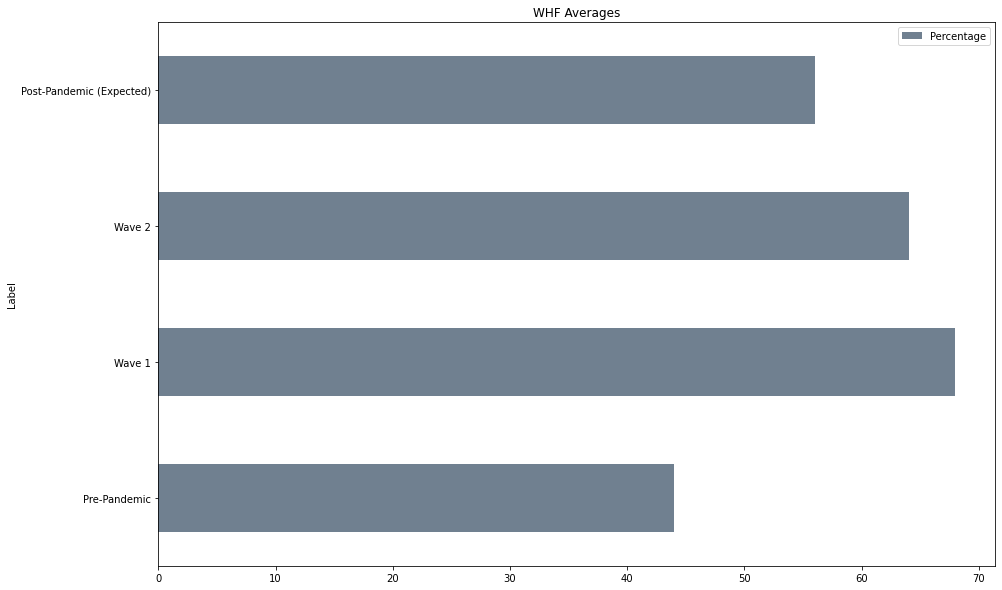

In [ ]:
#WFH Averages per Wave
wfhAvg = pd.DataFrame({ "Label" : ["Pre-Pandemic","Wave 1","Wave 2","Post-Pandemic (Expected)"],
                       "Percentage" :[44,68,64,56]
                      })

wfhPlot = wfhAvg.plot.barh(title="WHF Averages",x="Label", y="Percentage",figsize=(15,10),ylabel="Percentage (%)",color="slategrey")

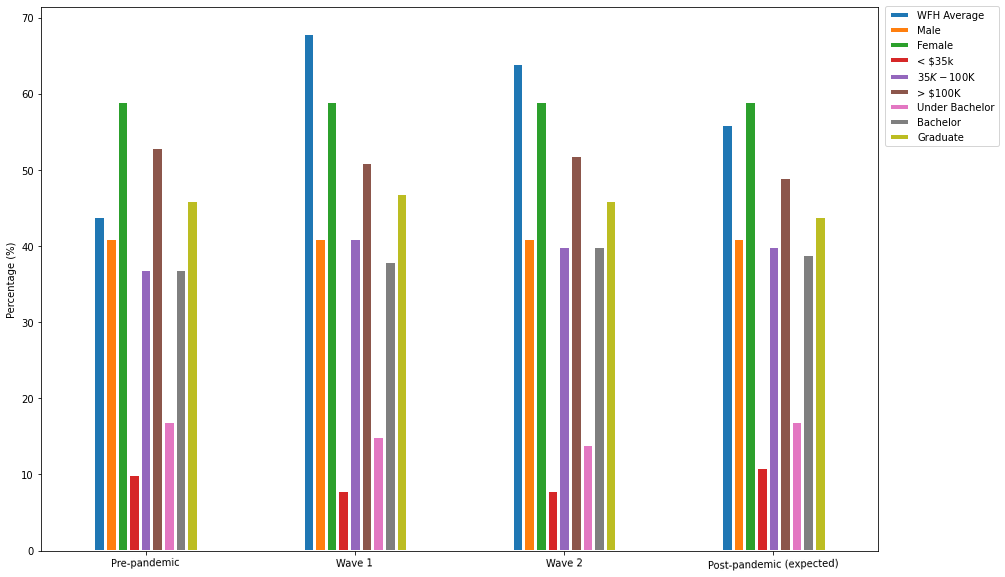

In [ ]:
#Covid Data Plot
waveInfo = pd.read_csv("waveInfo.csv")
xLabels = ["Pre-pandemic","Wave 1", "Wave 2", "Post-pandemic (expected)"]

plot = waveInfo.plot.bar(rot=True, figsize=(15,10), edgecolor='white', linewidth=3)
plot.set_xticklabels(xLabels)
plot.set_ylabel("Percentage (%)")
plot.legend(
    bbox_to_anchor=(1.15,1.01)
)

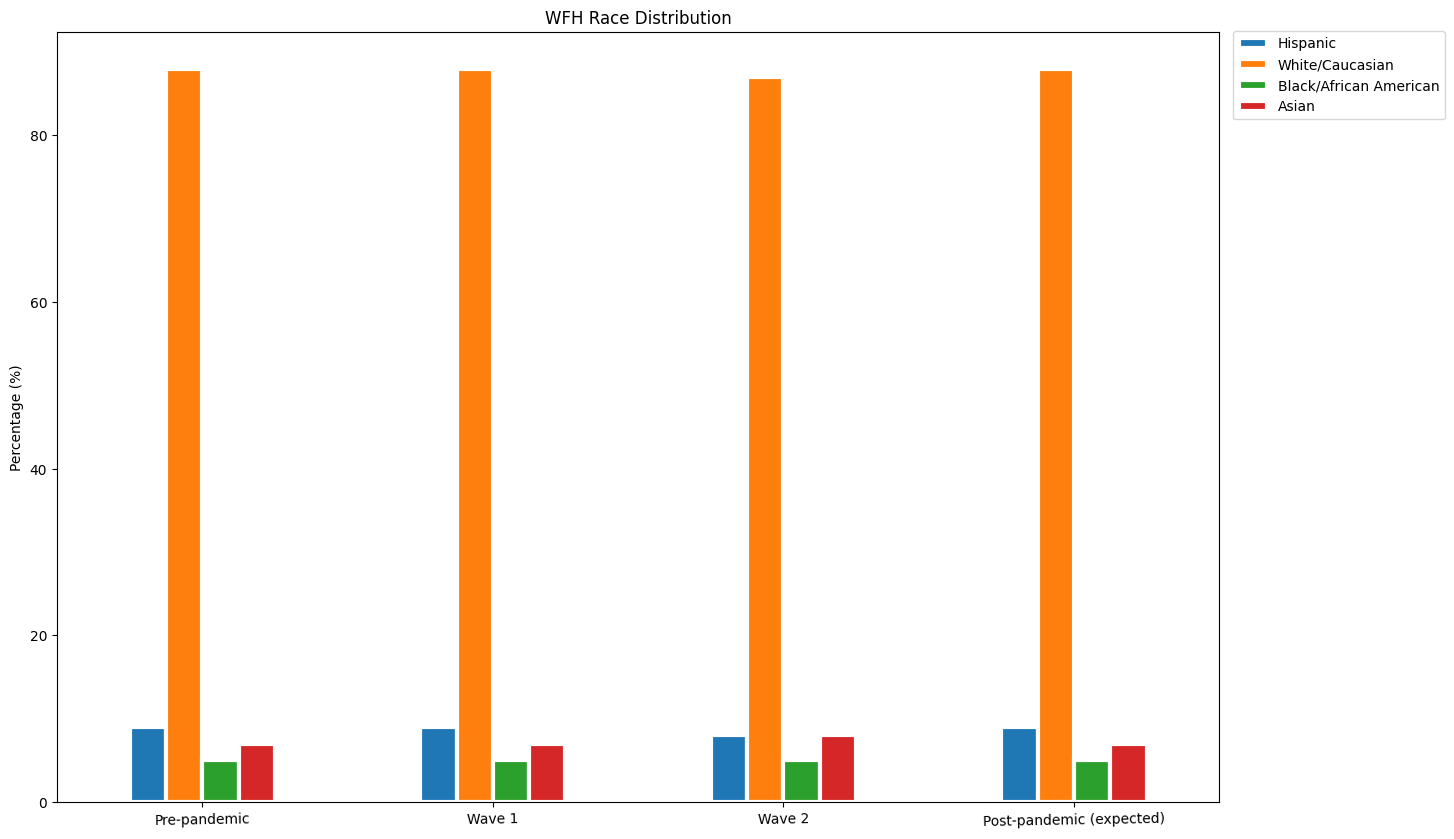

In [ ]:
#WFH Race Dist (Grouped Bar Version)
waveLabels = ["Pre-pandemic","Wave 1", "Wave 2", "Post-pandemic (expected)"]
raceDist = pd.DataFrame({
    "Hispanic":[9,9,8,9],
    "White/Caucasian":[88,88,87,88],
    "Black/African American":[5,5,5,5],
    "Asian":[7,7,8,7]
})

racePlot = raceDist.plot.bar(rot=True, figsize=(15,10), edgecolor='white', linewidth=3,title="WFH Race Distribution")
racePlot.set_xticklabels(waveLabels)
racePlot.set_ylabel("Percentage (%)")
racePlot.legend(
    bbox_to_anchor=(1.2,1.01)
)

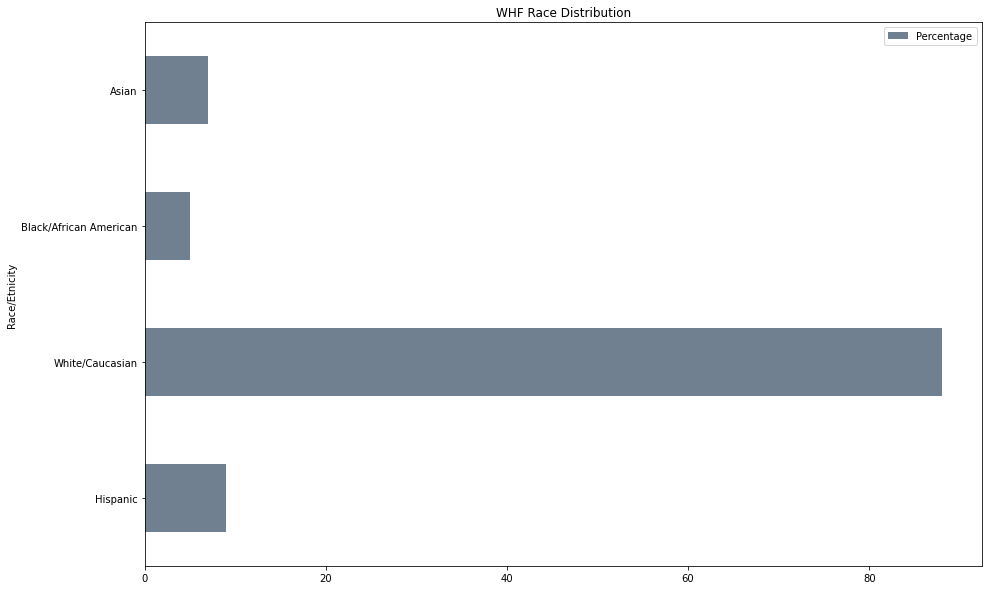

In [ ]:
#WFH Race Distribution
raceDist = pd.DataFrame({ "Race/Etnicity" : ["Hispanic","White/Caucasian","Black/African American","Asian"],
                       "Percentage" :[9,88,5,7]
                      })

racePlot = raceDist.plot.barh(title="WHF Race Distribution",x="Race/Etnicity", y="Percentage",figsize=(15,10),ylabel="Percentage (%)",color="slategrey")


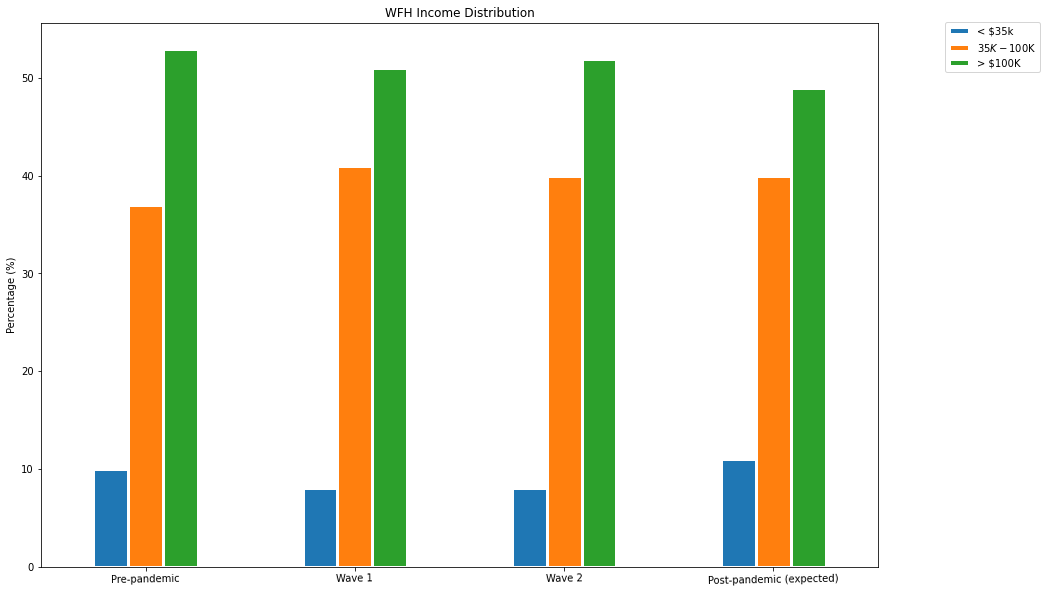

In [ ]:
# Income Averages
incomeDist = pd.DataFrame({
    "< $35k":[10,8,8,11],
    "$35K-$100K": [37,41,40,40],
    "> $100K": [53,51,52,49]
})

incomePlot = incomeDist.plot.bar(rot=True, figsize=(15,10), edgecolor='white', linewidth=3,title="WFH Income Distribution")
incomePlot.set_xticklabels(waveLabels)
incomePlot.set_ylabel("Percentage (%)")
incomePlot.legend(
    bbox_to_anchor=(1.2,1.01)
)

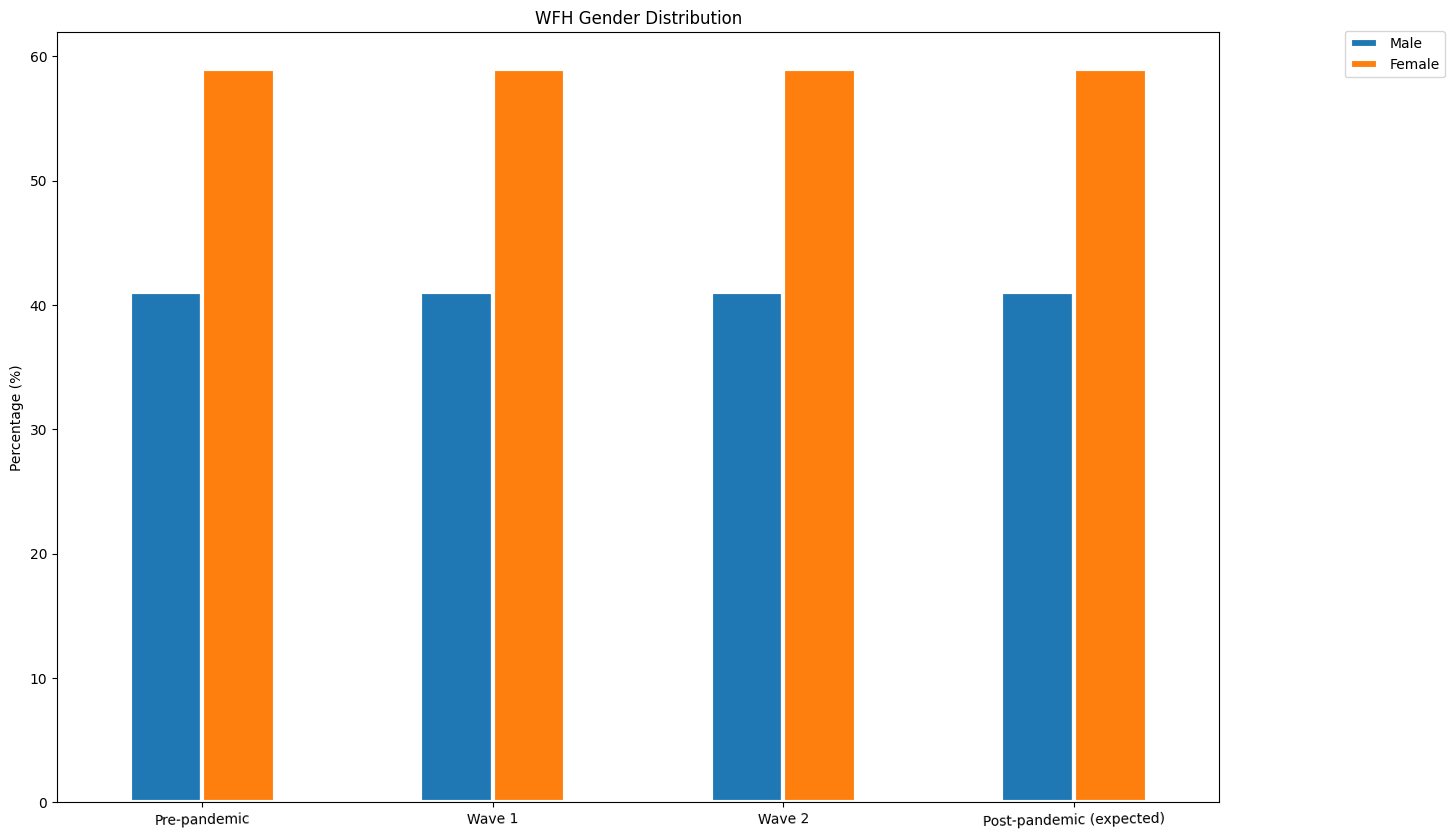

In [ ]:
# Gender
genderDist = pd.DataFrame({
    "Male" : [41, 41, 41, 41],
    "Female":[59, 59, 59, 59]
})

genderPlot = genderDist.plot.bar(rot=True, figsize=(15,10), edgecolor='white', linewidth=3,title="WFH Gender Distribution")
genderPlot.set_xticklabels(waveLabels)
genderPlot.set_ylabel("Percentage (%)")
genderPlot.legend(
    bbox_to_anchor=(1.2,1.01)
)

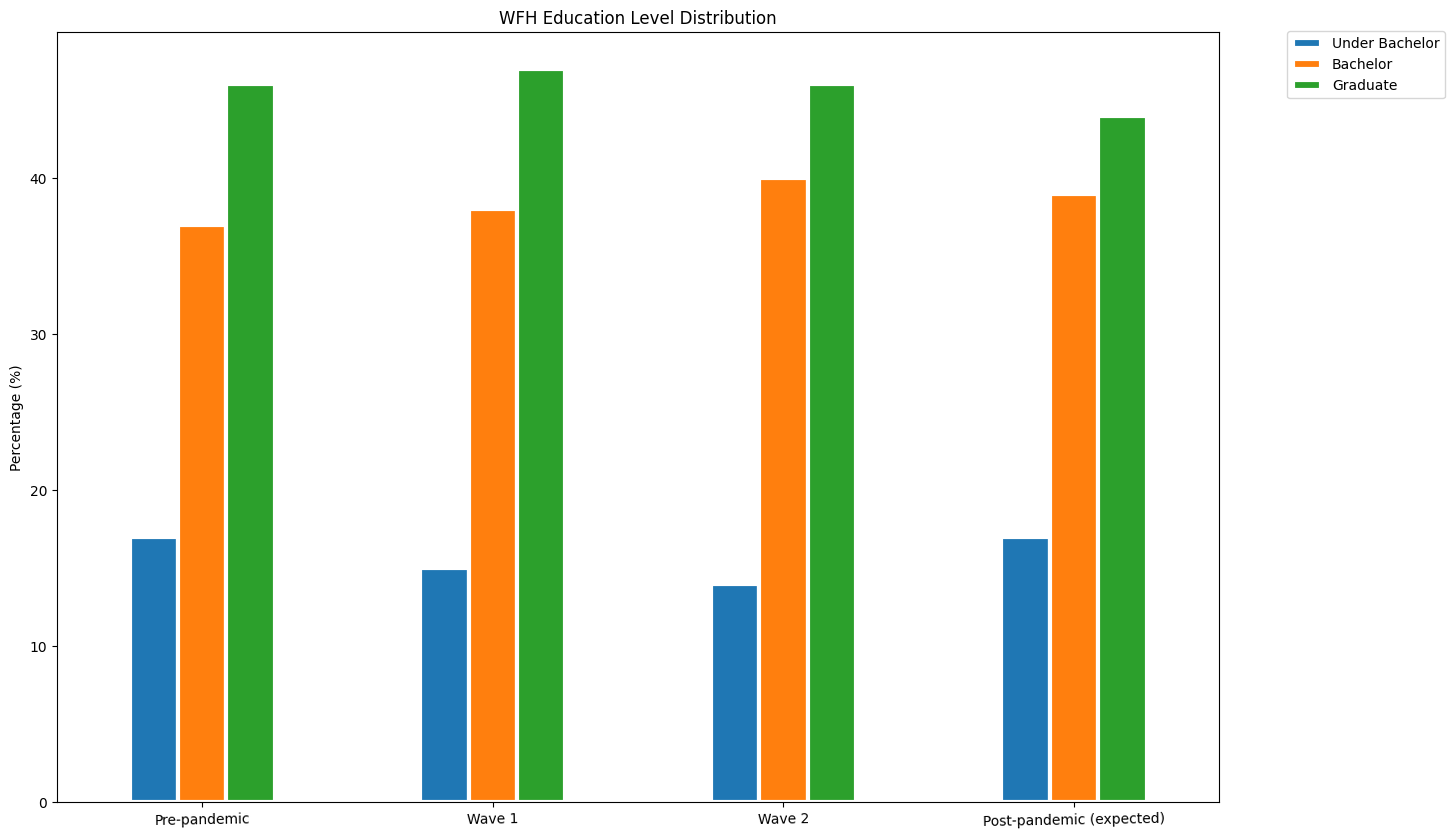

In [ ]:
# Education
edDist = pd.DataFrame({
    "Under Bachelor" : [17, 15, 14, 17],
    "Bachelor":[37, 38, 40, 39],
    "Graduate":[46, 47, 46, 44]
})

edPlot = edDist.plot.bar(rot=True, figsize=(15,10), edgecolor='white', linewidth=3,title="WFH Education Level Distribution")
edPlot.set_xticklabels(waveLabels)
edPlot.set_ylabel("Percentage (%)")
edPlot.legend(
    bbox_to_anchor=(1.2,1.01)
)

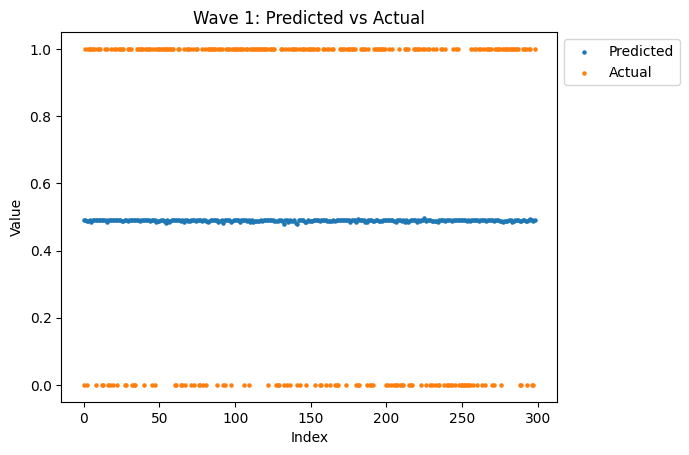

In [138]:
# Predicted vs Actual For Test Data Rows:
# y = Range from Yes to No
# x = test data rows
# comparing model to actual data

import matplotlib.pyplot as plt

############################ WAVE 1 ####################################
df = pd.read_csv('Wave1_test.csv')
p = df["WFH_PRE"]
act = p.to_numpy().astype(float).tolist()

exp = pd.read_csv('age_job_categroy_wave1.csv')
exp = exp["4.904520809650421143e-01"].to_numpy().astype(float).tolist()
exp.append(4.904520809650421143e-01)

# Made up expected vals for now:
index = []
for i in range(299):
    index.append(i)


plt.scatter(index, exp, s=5)
plt.scatter(index, act, s=5)

plt.title("Wave 1: Predicted vs Actual")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend(labels=["Predicted", "Actual"], bbox_to_anchor=[1,1])
plt.show()

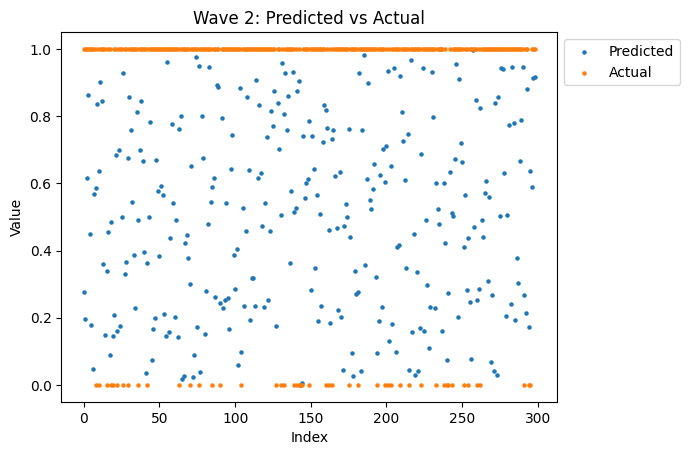

In [131]:
# Predicted vs Actual For Test Data Rows:
# y = Range from Yes to No
# x = test data rows
# comparing model to actual data

############################ WAVE 2 ####################################
df = pd.read_csv('Wave2_test.csv')
p = df["wfh_expect"]
post = p.array
act2 = []

for i in post:
    if i == "Yes":
        act2.append(1.0)
    else:
        act2.append(0.0)

# Made up expected vals for now:
pred2 = []
for i in range(299):
    pred2.append(np.random.uniform(low= 0, high= 1))


plt.scatter(index, pred2, s= 5)
plt.scatter(index, act2, s= 5)

plt.title("Wave 2: Predicted vs Actual")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend(labels=["Predicted", "Actual"], bbox_to_anchor=[1,1])
plt.show()